###### A textile company regularly spent money on five advertising companies for their ads. (Dataset added along with)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Add_sales_data_2018.csv')
df.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,08/10/2018,208.00,222.25,206.85,216.00,215.15,4093.065
1,05/10/2018,217.00,218.60,205.90,210.25,209.20,4042.448
2,04/10/2018,223.50,227.80,216.15,217.25,218.20,4213.819
3,03/10/2018,230.00,237.50,225.75,226.45,227.60,4391.665
4,01/10/2018,234.55,234.60,221.05,230.30,230.90,4350.683


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [4]:
df.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


In [5]:
df.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [6]:
df.shape

(205, 7)

In [7]:
df.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

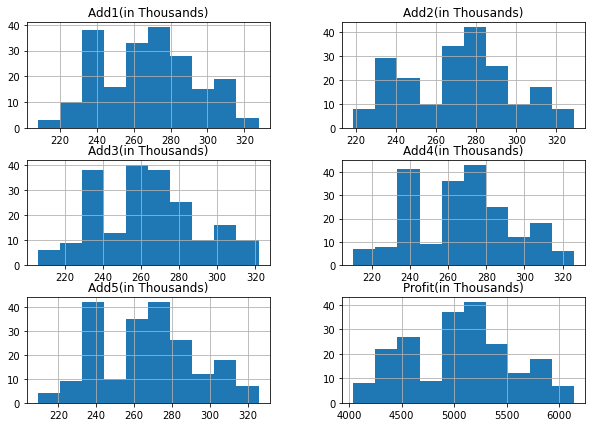

In [8]:
df.hist(figsize=(10,7))# check the variables for distribution
plt.show()

Each variable has continuous nominal data values

##### Check for Outliers

In [9]:
df.nunique()

Date                    205
Add1(in Thousands)      173
Add2(in Thousands)      190
Add3(in Thousands)      187
Add4(in Thousands)      192
Add5(in Thousands)      194
Profit(in Thousands)    205
dtype: int64

<Figure size 1224x1224 with 0 Axes>

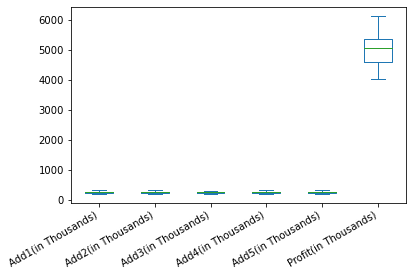

In [10]:
plt.figure(figsize=(17,17))
df.plot(kind='box', vert=True)
plt.gcf().autofmt_xdate()

##### There is no outliers

### 1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.


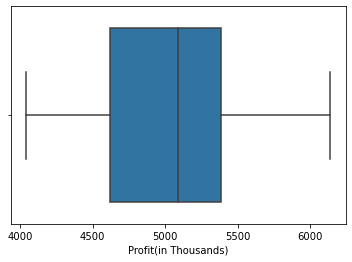

In [11]:
#Target is 'Profit(in Thousands)'
sns.boxplot(x=df['Profit(in Thousands)'])
plt.show()

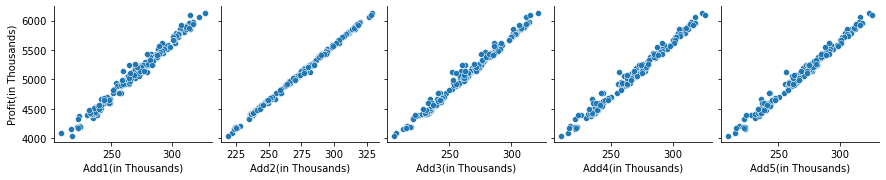

In [12]:
sns.pairplot(df,x_vars=['Add1(in Thousands)','Add2(in Thousands)','Add3(in Thousands)','Add4(in Thousands)','Add5(in Thousands)'],y_vars=['Profit(in Thousands)'])
plt.show()

All the variables have linear relationship with target variable 'Profit(in Thousands)'

In [13]:
df.corr()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
Add1(in Thousands),1.000000,0.990976,0.986274,0.976365,0.976716,0.991975
Add2(in Thousands),0.990976,1.000000,0.987990,0.989921,0.990285,0.999145
Add3(in Thousands),0.986274,0.987990,1.000000,0.991343,0.991908,0.993389
Add4(in Thousands),0.976365,0.989921,0.991343,1.000000,0.999699,0.993346
Add5(in Thousands),0.976716,0.990285,0.991908,0.999699,1.000000,0.993710
Profit(in Thousands),0.991975,0.999145,0.993389,0.993346,0.993710,1.000000


<AxesSubplot:>

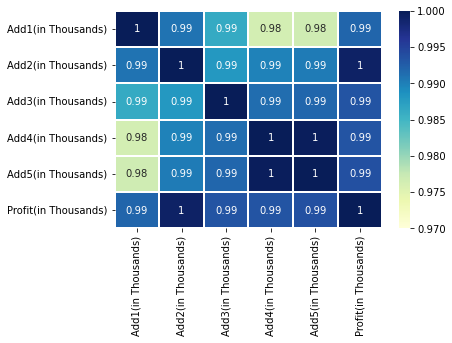

In [14]:
sns.heatmap(df.corr(),annot=True,vmin=0.97,vmax=1,linewidth=0.2,cmap='YlGnBu')

#### Conclusion : There is strong positive correlationship between the amount spent for advertising through five different companies and profit generated.

### 2.Build a regression model to predict the profit from the given data and comment your findings on it.

In [15]:
y = df['Profit(in Thousands)']#Defined target
X= df.drop(['Profit(in Thousands)','Date'],axis=1)
print(X.shape)
print(y.shape)

(205, 5)
(205,)


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=5,test_size=0.3)

In [17]:
from sklearn import linear_model
reg = linear_model.LinearRegression() 
model = reg.fit(X_train,y_train)
pred = model.predict(X_test)
pred

array([5017.503, 4390.996, 5435.316, 4599.49 , 4461.325, 5717.838,
       4418.709, 4436.321, 5384.175, 5167.878, 5300.437, 4451.999,
       5250.15 , 4934.682, 5910.98 , 5890.012, 4925.861, 4916.064,
       5187.445, 4705.198, 5065.652, 5058.14 , 4432.864, 5359.346,
       5088.455, 4416.136, 4391.665, 5019.997, 5374.105, 4671.113,
       5903.253, 4623.793, 5421.842, 5780.799, 4506.279, 5190.758,
       4947.72 , 4326.782, 5172.76 , 4477.226, 4486.996, 4558.651,
       5972.337, 4569.293, 5616.186, 5421.94 , 5397.739, 4435.174,
       5113.337, 5491.792, 4548.11 , 4605.783, 4760.877, 4465.95 ,
       4606.34 , 4042.448, 5465.277, 5378.379, 5730.999, 5107.437,
       5789.791, 5676.934])

In [18]:
y_test

154    5017.503
21     4390.996
198    5435.316
48     4599.490
34     4461.325
         ...   
114    5378.379
169    5730.999
165    5107.437
172    5789.791
196    5676.934
Name: Profit(in Thousands), Length: 62, dtype: float64

In [19]:
print('Coefficients: ', reg.coef_)

Coefficients:  [ 1.   12.38  3.5   1.    0.9 ]


In [20]:
#accuracy
from sklearn.metrics import mean_squared_error,r2_score
print("MSE:",mean_squared_error(y_test,pred).round())
print("R2_Score",r2_score(y_test,pred))
print('Variance score: {}'.format(reg.score(X_test, y_test)))

MSE: 0.0
R2_Score 1.0
Variance score: 1.0


In [21]:
#Get Results
print('coefficient of determination:',r2_score(y_test,pred))
print('intercept:', model.intercept_.round())
print('slope:', model.coef_)

coefficient of determination: 1.0
intercept: -0.0
slope: [ 1.   12.38  3.5   1.    0.9 ]


#### Model is perfectly fitted

In [22]:
#Linear Equation,y
y=model.coef_*X+model.intercept_.round()
y.head()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands)
0,208.00,2751.455,723.975,216.00,193.635
1,217.00,2706.268,720.650,210.25,188.280
2,223.50,2820.164,756.525,217.25,196.380
3,230.00,2940.250,790.125,226.45,204.840
4,234.55,2904.348,773.675,230.30,207.810


In [23]:
ad_spend = np.array([290,312,309,298,320]).reshape(1, -1) 
model.predict(ad_spend)

array([5820.06])

In [24]:
y_pred = model.predict(X)
print('predicted response:', y_pred, sep='\n')

predicted response:
[4093.065 4042.448 4213.819 4391.665 4350.683 4404.686 4418.709 4470.775
 4425.005 4446.441 4411.775 4435.571 4464.11  4434.805 4379.901 4152.066
 4175.677 4326.782 4190.965 4193.095 4178.008 4390.996 4523.704 4465.95
 4435.174 4436.321 4451.999 4453.773 4416.136 4482.183 4598.292 4617.695
 4566.31  4513.6   4461.325 4419.421 4435.816 4480.363 4486.38  4506.279
 4486.996 4453.205 4432.864 4672.391 4648.627 4606.34  4558.651 4519.061
 4599.49  4643.716 4548.11  4477.226 4494.144 4605.783 4671.113 4760.877
 4947.72  5071.736 5133.766 5190.814 5145.131 5088.455 5234.487 5250.775
 5239.06  5075.858 5038.222 5001.615 5004.282 5030.451 4977.891 4916.064
 4890.723 4936.12  5113.337 5163.693 5225.14  5187.445 5057.155 5013.207
 5043.705 5027.633 5034.726 4980.446 4925.861 4923.127 5015.536 5058.14
 4937.03  4898.776 4887.296 4836.837 4763.69  4705.198 4676.653 4623.793
 4647.356 4648.834 4569.293 4772.52  5131.898 5421.94  5453.24  5498.553
 5518.561 5511.42  5430.79  5452.

In [25]:
y_pred = model.intercept_ + np.sum(model.coef_ * X, axis=1)
print('predicted response:', y_pred, sep='\n')

predicted response:
0      4093.065
1      4042.448
2      4213.819
3      4391.665
4      4350.683
         ...   
200    5374.105
201    5439.655
202    5545.013
203    5565.444
204    5421.842
Length: 205, dtype: float64


In [26]:
ad_spend = np.array([290,312,309,298,320]).reshape(1, -1) 
model.predict(ad_spend)

array([5820.06])

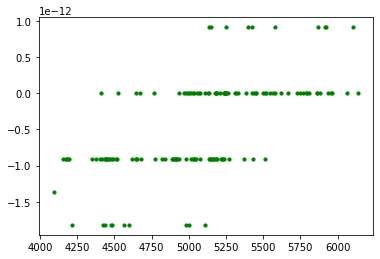

In [27]:
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')

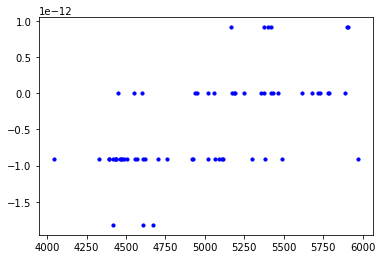

In [28]:
# plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')


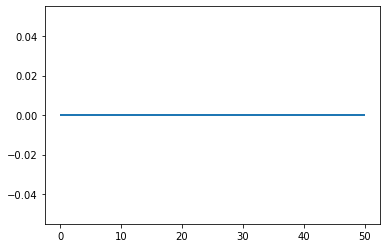

In [29]:
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)

In [30]:
pd.DataFrame({'Actual': pd.DataFrame(y_test).values.reshape(-1),
              'Predicted value': pd.DataFrame(pred).values.reshape(-1)})

,Actual,Predicted value
0,5017.503,5017.503
1,4390.996,4390.996
2,5435.316,5435.316
3,4599.490,4599.490
4,4461.325,4461.325
...,...,...
57,5378.379,5378.379
58,5730.999,5730.999
59,5107.437,5107.437
60,5789.791,5789.791


/Users/recruiter/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


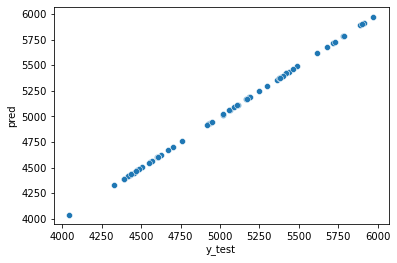

In [31]:
#Model efficiency
sns.scatterplot(y_test,pred)
plt.ylabel('pred')
plt.xlabel('y_test')
plt.show()

/Users/recruiter/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'y_test')

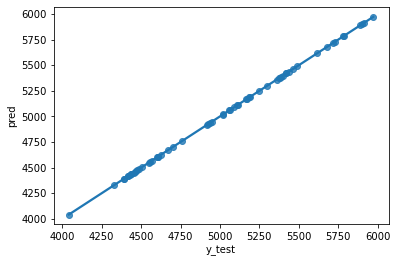

In [32]:
#Linear Regression Model Visualisation
sns.regplot(y_test,pred)
plt.ylabel('pred')
plt.xlabel('y_test')

### 3.Predict the profit generated by the company, if they wish to spend the following amount for advertisement.
 

In [33]:
ad_spend = np.array([290,312,309,298,320]).reshape(1, -1) 
model.predict(ad_spend)

array([5820.06])

OR

In [34]:
profit=dict({'Add1(in Thousands)':[290],'Add2(in Thousands)':[312],'Add3(in Thousands)':[309],'Add4(in Thousands)':[298],'Add5(in Thousands)':[320]})
Profit=pd.DataFrame(profit)
model.predict(Profit)

array([5820.06])